# Problem Statement
### Analyzing the given Aerofit Dataset to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers.

#### 1. Basic Analysis and Information about the Dataset
#### 2. Data cleaning- filling missing values, removing outliers, converting categorical to numerical data, creating bins

In [591]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import geom

In [592]:
#loading data 

data=pd.read_csv('Aerofit-DAV.txt')
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [593]:
data.shape

(180, 9)

In [594]:
data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [595]:
data.count()

Product          180
Age              180
Gender           180
Education        180
MaritalStatus    180
Usage            180
Fitness          180
Income           180
Miles            180
dtype: int64

In [596]:
data.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [597]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [598]:
data=data.drop_duplicates()   # removing duplicates if any
data.shape                    # No dupicate rows present in the data

(180, 9)

In [599]:
data.isna().sum()       # no missing values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [669]:
data['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [670]:
data['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [601]:
data['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [654]:
data['Income'].value_counts()

45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: Income, Length: 62, dtype: int64

In [655]:
data['Miles'].value_counts().head()

# Most Treadmill users run around 85-95 miles a week

85    27
95    12
66    10
75    10
47     9
Name: Miles, dtype: int64

In [657]:
data['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [653]:
data['Age'].value_counts().head(10)

# The most Treadmill users belong to the age group of 23-26

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
Name: Age, dtype: int64

In [604]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [605]:
# Difference of Mean & Median of the Numerical Data

data_mean=data[['Age','Education','Usage','Fitness','Income','Miles']].mean()
data_median= data[['Age','Education','Usage','Fitness','Income','Miles']].median()
data_mean-data_median

Age             2.788889
Education      -0.427778
Usage           0.455556
Fitness         0.311111
Income       3123.077778
Miles           9.194444
dtype: float64

In [606]:
# Since there is a huge differnce in Mean and Median suggest the skweness of the data because od outliers
# since there is huge differnce in Income and Miles we can remove the outliers in these features

### Removing Outliers

<AxesSubplot:>

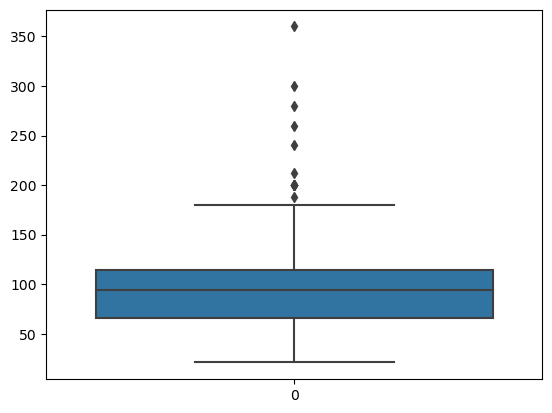

In [607]:
sns.boxplot(data=data['Miles'])

In [608]:
np.median(data['Miles'])

94.0

In [609]:
min(data['Miles']),max(data['Miles'])

(21, 360)

In [610]:
### Removing outliers from Miles by using interquartile range
Miles_75=np.percentile(data['Miles'], 75)
Miles_25=np.percentile(data['Miles'], 25)
Miles_IQR=Miles_75-Miles_25
Miles_IQR
Miles_UW=Miles_75+(1.5*Miles_IQR)
Miles_LW=max(Miles_25-(1.5*Miles_IQR),min(data['Miles']))
Miles_LW,Miles_UW

(21, 187.875)

In [611]:
# getting data without Miles Outliers
new_data=data.loc[data['Miles']<=187.875]
new_data.shape

(167, 9)

<AxesSubplot:>

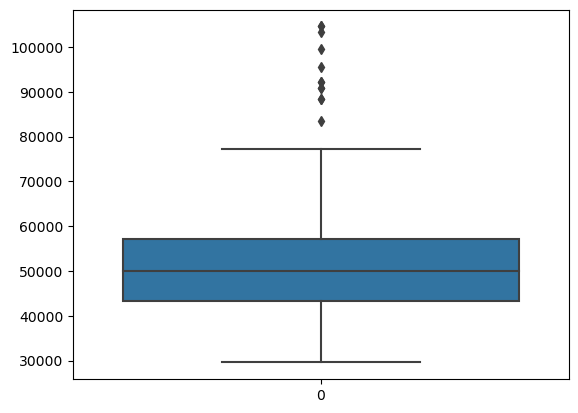

In [612]:
sns.boxplot(data=new_data['Income'])

In [613]:
np.median(new_data['Income'])

50028.0

In [614]:
min(new_data['Income']),max(new_data['Income'])

(29562, 104581)

In [615]:
### Removing outliers from Income by using interquartile range
Income_75=np.percentile(new_data['Income'], 75)
Income_25=np.percentile(new_data['Income'], 25)
Income_IQR=Income_75-Income_25
Income_IQR
Income_UW=Income_75+(1.5*Income_IQR)
Income_LW=max(Income_25-(1.5*Income_IQR),min(new_data['Miles']))
Income_LW,Income_UW

(22424.25, 77842.25)

In [616]:
new_data=new_data.loc[(new_data['Income']<=77842.25) & (new_data['Income']>=22424.25)]
new_data.shape

(155, 9)

In [617]:
new_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,28.335484,15.296774,3.206452,3.077419,48980.232258,88.870968
std,6.724908,1.428714,0.895129,0.793934,9744.641277,32.696104
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,23.000000,14.000000,3.000000,3.000000,42637.500000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,48891.000000,85.000000
75%,33.000000,16.000000,4.000000,3.000000,54576.000000,106.000000
max,50.000000,21.000000,7.000000,5.000000,77191.000000,180.000000


### Analysis

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

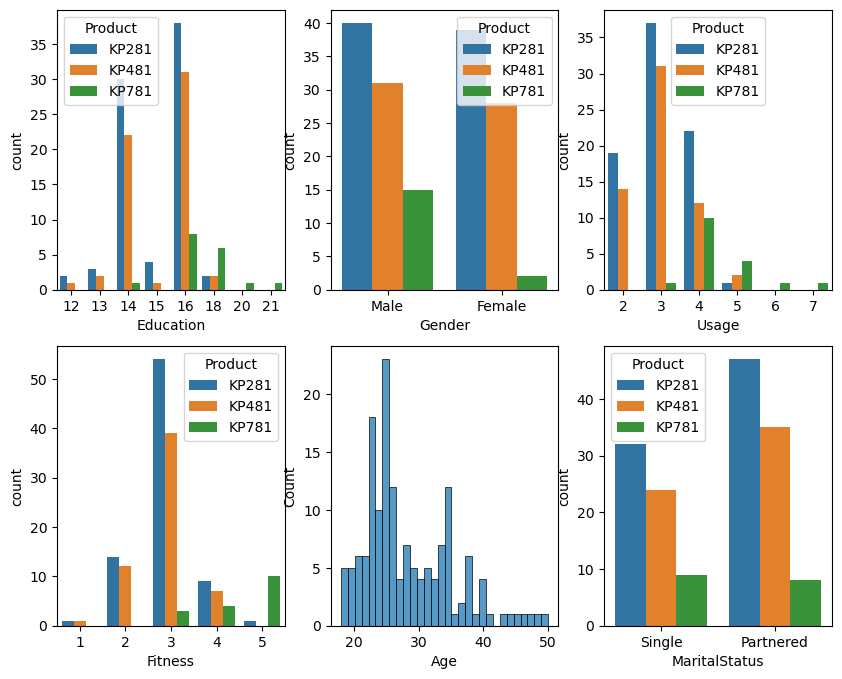

In [649]:
# Univariate Analysis
# Univariate Analysis on NUmerical and categorical variables like Education, Gender, Usage, Fitness, Age, Marital Status

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.countplot(data=new_data,x='Education', hue='Product')
plt.subplot(2,3,2)
sns.countplot(data=new_data, x='Gender',hue='Product')
plt.subplot(2,3,3)
sns.countplot(data=new_data, x='Usage',hue='Product')
plt.subplot(2,3,4)
sns.countplot(data=new_data, x='Fitness',hue='Product')
plt.subplot(2,3,5)
sns.histplot(data=new_data, x='Age', bins=30)
plt.subplot(2,3,6)
sns.countplot(data=new_data, x='MaritalStatus', hue='Product')

In [672]:
# INSIGHTS

# The most of the treadmill users belong to age-(23-26),with 14-16 years Education and are married. 
# KP481 is slightly more famous among Partnered than single people
# Most of the KP281 and KP481 users use treadmills 2 to 4 times a week whereas KP781 users use 4-5 times a week
# Mojority of KP281 and KP481 users rate themselves 3 where KP781 users rate themselves 4-5 in fitness
# Eventhough there are almost same number of male and female users of for KP281 & KP481, for KP781 the male users are much higher than female users

<AxesSubplot:xlabel='Age', ylabel='count'>

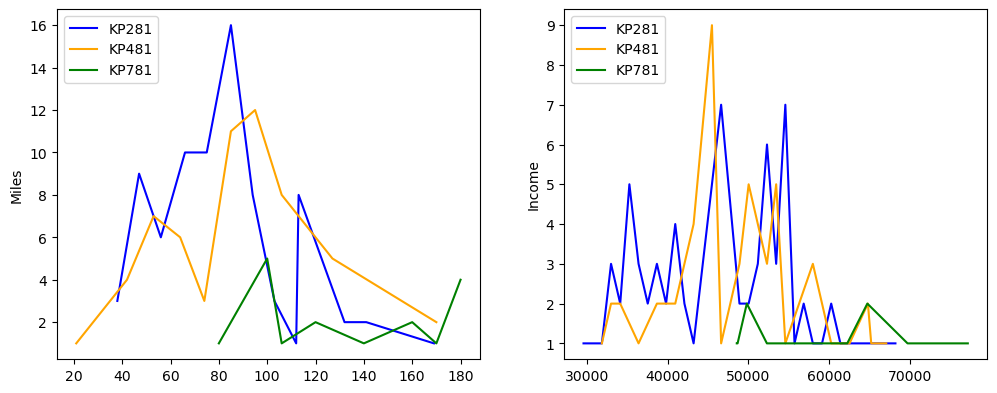

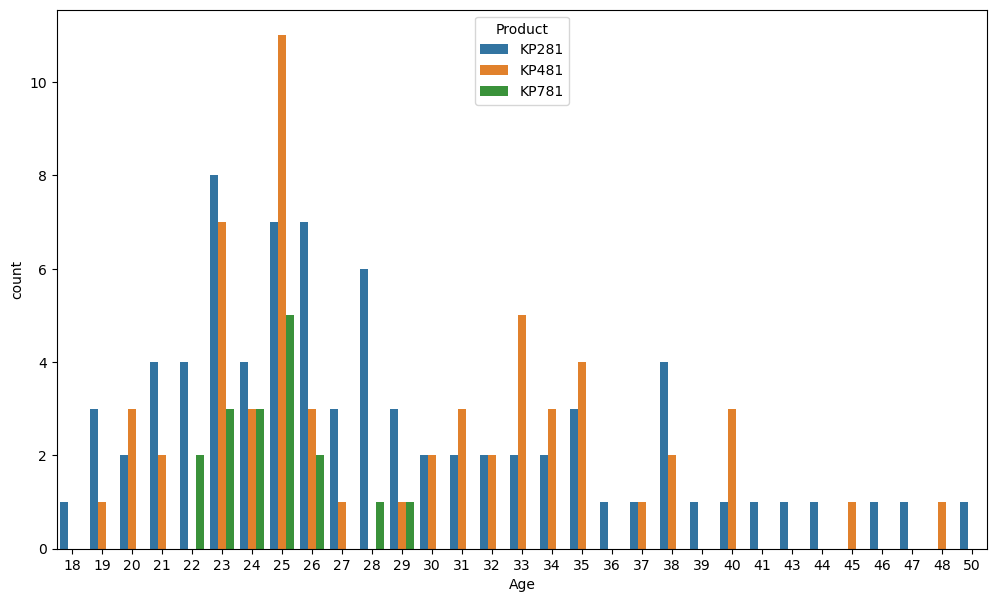

In [673]:
KP281_data=new_data.loc[new_data['Product']=='KP281']
KP481_data=new_data.loc[new_data['Product']=='KP481']
KP781_data=new_data.loc[new_data['Product']=='KP781']

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
d1=KP281_data['Miles'].value_counts()
x1=d1.index
y1=d1
d2=KP481_data['Miles'].value_counts()
x2=d2.index
y2=d2
d3=KP781_data['Miles'].value_counts()
x3=d3.index
y3=d3
sns.lineplot(x=x1, y=y1, color='blue')
sns.lineplot(x=x2, y=y2, color='orange')
sns.lineplot(x=x3, y=y3, color='green')
plt.legend(['KP281', 'KP481','KP781'], loc='upper left')

plt.subplot(2,2,2)
d1=KP281_data['Income'].value_counts()
x1=d1.index
y1=d1
d2=KP481_data['Income'].value_counts()
x2=d2.index
y2=d2
d3=KP781_data['Income'].value_counts()
x3=d3.index
y3=d3
sns.lineplot(x=x1, y=y1, color='blue')
sns.lineplot(x=x2, y=y2, color='orange')
sns.lineplot(x=x3, y=y3, color='green')
plt.legend(['KP281', 'KP481','KP781'], loc='upper left')

plt.figure(figsize=(12,7))
sns.countplot(data=new_data, x='Age', hue='Product')

In [ ]:
# INSIGHTS

# Mojority of KP281 & KP481 run 60-100 and 80-110 miles respectively whereas few KP781 users run 80-100 and few more than 170 miles a week
# The Income for most KP281 users range from 40-45k, for KP481 45-55k and for KP781 55-65k.
# For KP 781 all the users belong between age 22 and 30
# Whereas for other 2 models they are purchased by all age categories but most by people between age 23 and 28.

In [668]:
grouped_data=new_data.groupby('Product')
mean_table=new_data.groupby('Product')[['Age','Income','Education','Fitness', 'Usage','Miles']].mean()
mean_table

,Age,Income,Education,Fitness,Usage,Miles
Product,,,,,,
KP281,28.607595,46444.291139,15.025316,2.936709,3.063291,81.455696
KP481,29.033898,49225.576271,15.135593,2.881356,3.033898,85.830508
KP781,24.647059,59913.411765,17.117647,4.411765,4.470588,133.882353


In [674]:
# Insights

# The KP781 users run more miles a week and Use Treadmills more frequently, which could be the reason why they rate themselves hight compared to other treadmill users
# The Average Income of KP781 users is higher comapred to KP281 and KP481
# The Average AGe of KP781 users is less comapred to KP281 and KP481

### Conversion of categorical variable Income to category Bins

In [675]:
start_range=[29000,42000,54000,80000]
cat_name=['Low_Income','Med_Income','High_Income']
new_data['Income_Bins']=pd.cut(new_data['Income'], bins=start_range, labels=cat_name)
pd.set_option('max_colwidth',10)
new_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_Bins
0,KP281,18,Male,14,Single,3,4,29562,112,Low_In...
1,KP281,19,Male,15,Single,2,3,31836,75,Low_In...
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low_In...
3,KP281,19,Male,12,Single,3,3,32973,85,Low_In...
4,KP281,20,Male,13,Partnered,4,2,35247,47,Low_In...


In [627]:
new_data['Income_Bins'].value_counts()

Med_Income     76
High_Income    42
Low_Income     37
Name: Income_Bins, dtype: int64

<AxesSubplot:xlabel='Product', ylabel='Income'>

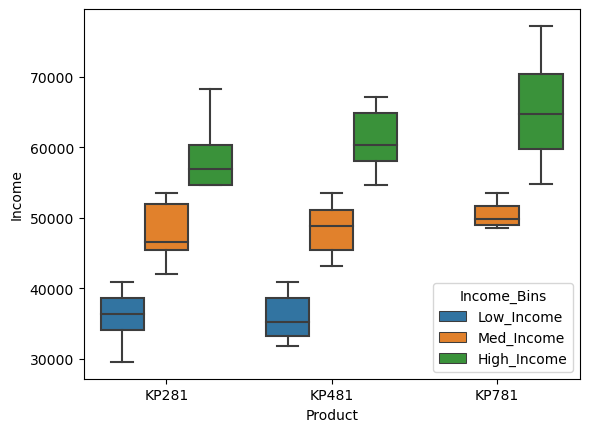

In [677]:
sns.boxplot(data=new_data, y='Income', x='Product', hue='Income_Bins')

In [ ]:
# Insights

# There are no Low Income users for KP781, i.e all the Low Income users use KP281 and KP481
# The Majority of KP 781 users belong to High Income category

<AxesSubplot:xlabel='Gender', ylabel='count'>

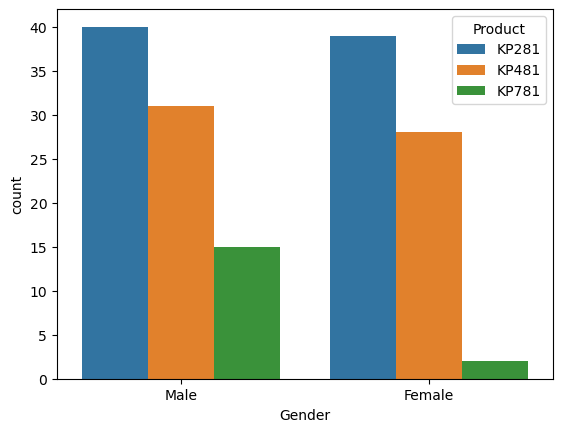

In [678]:
sns.countplot(data=new_data, x='Gender', hue='Product')

In [ ]:
# Unlike KP281 and KP481, the Female users for KP781 is very less compared to the Males users for KP781

### Probability Calculations

In [631]:
pd.crosstab(new_data['Income_Bins'],new_data['Product'], margins=True)

Product,KP281,KP481,KP781,All
Income_Bins,,,,
Low_Income,27,10,0,37
Med_Income,34,36,6,76
High_Income,18,13,11,42
All,79,59,17,155


In [679]:
pd.crosstab(new_data['Income_Bins'],new_data['Product'],normalize='all', margins=True)

Product,KP281,KP481,KP781,All
Income_Bins,,,,
Low_Income,0.174194,0.064516,0.000000,0.238710
Med_Income,0.219355,0.232258,0.038710,0.490323
High_Income,0.116129,0.083871,0.070968,0.270968
All,0.509677,0.380645,0.109677,1.000000


### Probabilty of buying a particular treadmill out of three variants by a user

In [681]:
# Marginal Probability
#the bottom row represents the probability of selecting each treadmill (p(KP281), p(KP481), p(KP781))

product_probability={'product':['KP281','KP481','KP481'],
                    'probability':[0.516340, 0.385621,0.385621]}
product_prob=pd.DataFrame(product_probability)
product_prob

,product,probability
0,KP281,0.516340
1,KP481,0.385621
2,KP481,0.385621


### The probability of choosing a particular treadmill by a person belonging to a certain Income group

In [683]:
# Joint Probability
# the each cell values in cross table gives the intesection of each product & Income category

joint_probability={'product ∩ income':['KP281 ∩ Low_Income','KP281 ∩ Med_Income','KP281 ∩ High_Income','KP481 ∩ Low_Income',
                            'KP481 ∩ Med_Income', 'KP481 ∩ High_Income', 'KP781 ∩ Low_Income','KP781 ∩ Med_Income',
                             'KP781 ∩ High_Income'],
                                       'probability':[0.176471, 0.222222,0.117647, 0.065359, 0.235294, 0.084967, 
                                                      0.000000,0.039216,0.058824]}
                    
joint_prob=pd.DataFrame(joint_probability)
pd.set_option('max_colwidth',50)
joint_prob

,product ∩ income,probability
0,KP281 ∩ Low_Income,0.176471
1,KP281 ∩ Med_Income,0.222222
2,KP281 ∩ High_Income,0.117647
3,KP481 ∩ Low_Income,0.065359
4,KP481 ∩ Med_Income,0.235294
5,KP481 ∩ High_Income,0.084967
6,KP781 ∩ Low_Income,0.000000
7,KP781 ∩ Med_Income,0.039216
8,KP781 ∩ High_Income,0.058824


#example- The probablity of selecting a KP481 by a Medium Income person is 0.235

### probability of choosing a particular product given that the buyer belongs to a particular Income category

In [685]:
#conditional proability

conditional_probability={'product/income':['KP281 / Low_Income','KP281 / Med_Income','KP281 / High_Income',
                                           'KP481 / Low_Income' ,
                            'KP481 / Med_Income', 'KP481 / High_Income', 'KP781 / Low_Income','KP781 / Med_Income',
                             'KP781 / High_Income'],
                'probability':[0.176471/0.241830, 0.222222/0.496732,0.117647/0.261438, 0.065359/0.241830,0.235294/0.496732,
                               0.084967/0.261438, 0.000000/0.241830,0.039216/0.496732,0.058824/0.261438]}
conditional_prob=pd.DataFrame(conditional_probability)
pd.set_option('max_colwidth',50)
conditional_prob

,product/income,probability
0,KP281 / Low_Income,0.729732
1,KP281 / Med_Income,0.447368
2,KP281 / High_Income,0.450000
3,KP481 / Low_Income,0.270268
4,KP481 / Med_Income,0.473684
5,KP481 / High_Income,0.324999
6,KP781 / Low_Income,0.000000
7,KP781 / Med_Income,0.078948
8,KP781 / High_Income,0.225002


#example- Probabiltiy that a customer belonging to high Income buying KP281 is 0.45

### probability of the buyer belonging to a particular Income category given the product he has purchased

In [686]:
#conditional proability

conditional_probability={'income/product':['Low_Income / KP281','Med_Income / KP281','High_Income / KP281',
                                           'Low_Income / KP481' ,'Med_Income / KP481', 'High_Income / KP481',
                                           'Low_Income / KP781','Med_Income / KP781','High_Income / KP781'],
            'probability':[0.176471/0.516340, 0.222222/0.516340,0.117647/0.516340, 0.065359/0.385621,
                           0.235294/0.385621, 0.084967/0.385621, 0.000000/0.098039,0.039216/0.098039,0.058824/0.098039]}
conditional_prob=pd.DataFrame(conditional_probability)
pd.set_option('max_colwidth',50)
conditional_prob

,income/product,probability
0,Low_Income / KP281,0.341773
1,Med_Income / KP281,0.430379
2,High_Income / KP281,0.227848
3,Low_Income / KP481,0.169490
4,Med_Income / KP481,0.610169
5,High_Income / KP481,0.220338
6,Low_Income / KP781,0.000000
7,Med_Income / KP781,0.400004
8,High_Income / KP781,0.600006


#example- Probability that a KP781 user belonging to High Income is 0.6

In [637]:
# PRODUCT VS GENDER
pd.crosstab(new_data['Gender'],new_data['Product'], margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,39,28,2,69
Male,40,31,15,86
All,79,59,17,155


In [687]:
pd.crosstab(new_data['Gender'],new_data['Product'],normalize='all', margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.251613,0.180645,0.012903,0.445161
Male,0.258065,0.200000,0.096774,0.554839
All,0.509677,0.380645,0.109677,1.000000


### probability of a particular gender selecting a particular treadmill- intersection

In [688]:
# Joint Probability
joint_probability={'product ∩ gender ':['KP281 ∩ Female','KP281 ∩ Male','KP481 ∩ Female','KP481 ∩ Male','KP781 ∩ Female','KP781 ∩ Male'],
                                       'probability':[0.254902,0.261438,0.183007, 0.202614, 0.006536, 0.091503]}
joint_gender_prob=pd.DataFrame(joint_probability)
pd.set_option('max_colwidth',50)
joint_gender_prob

,product ∩ gender,probability
0,KP281 ∩ Female,0.254902
1,KP281 ∩ Male,0.261438
2,KP481 ∩ Female,0.183007
3,KP481 ∩ Male,0.202614
4,KP781 ∩ Female,0.006536
5,KP781 ∩ Male,0.091503


#example- probablity that a Male user buys KP781 is 0.09 and Female user buying KP781 is .0065

<AxesSubplot:>

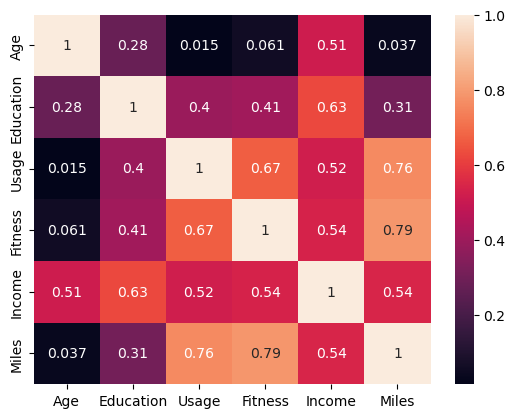

In [641]:
sns.heatmap(data.corr(), annot=True)

In [642]:
# miles have a postive corelation with the fitness and usage
# Age has a negetive correlation with Miles &Usage- hence younger gen is fitter than older gen
# higher income group also tend to spend good amount of time on their fitness

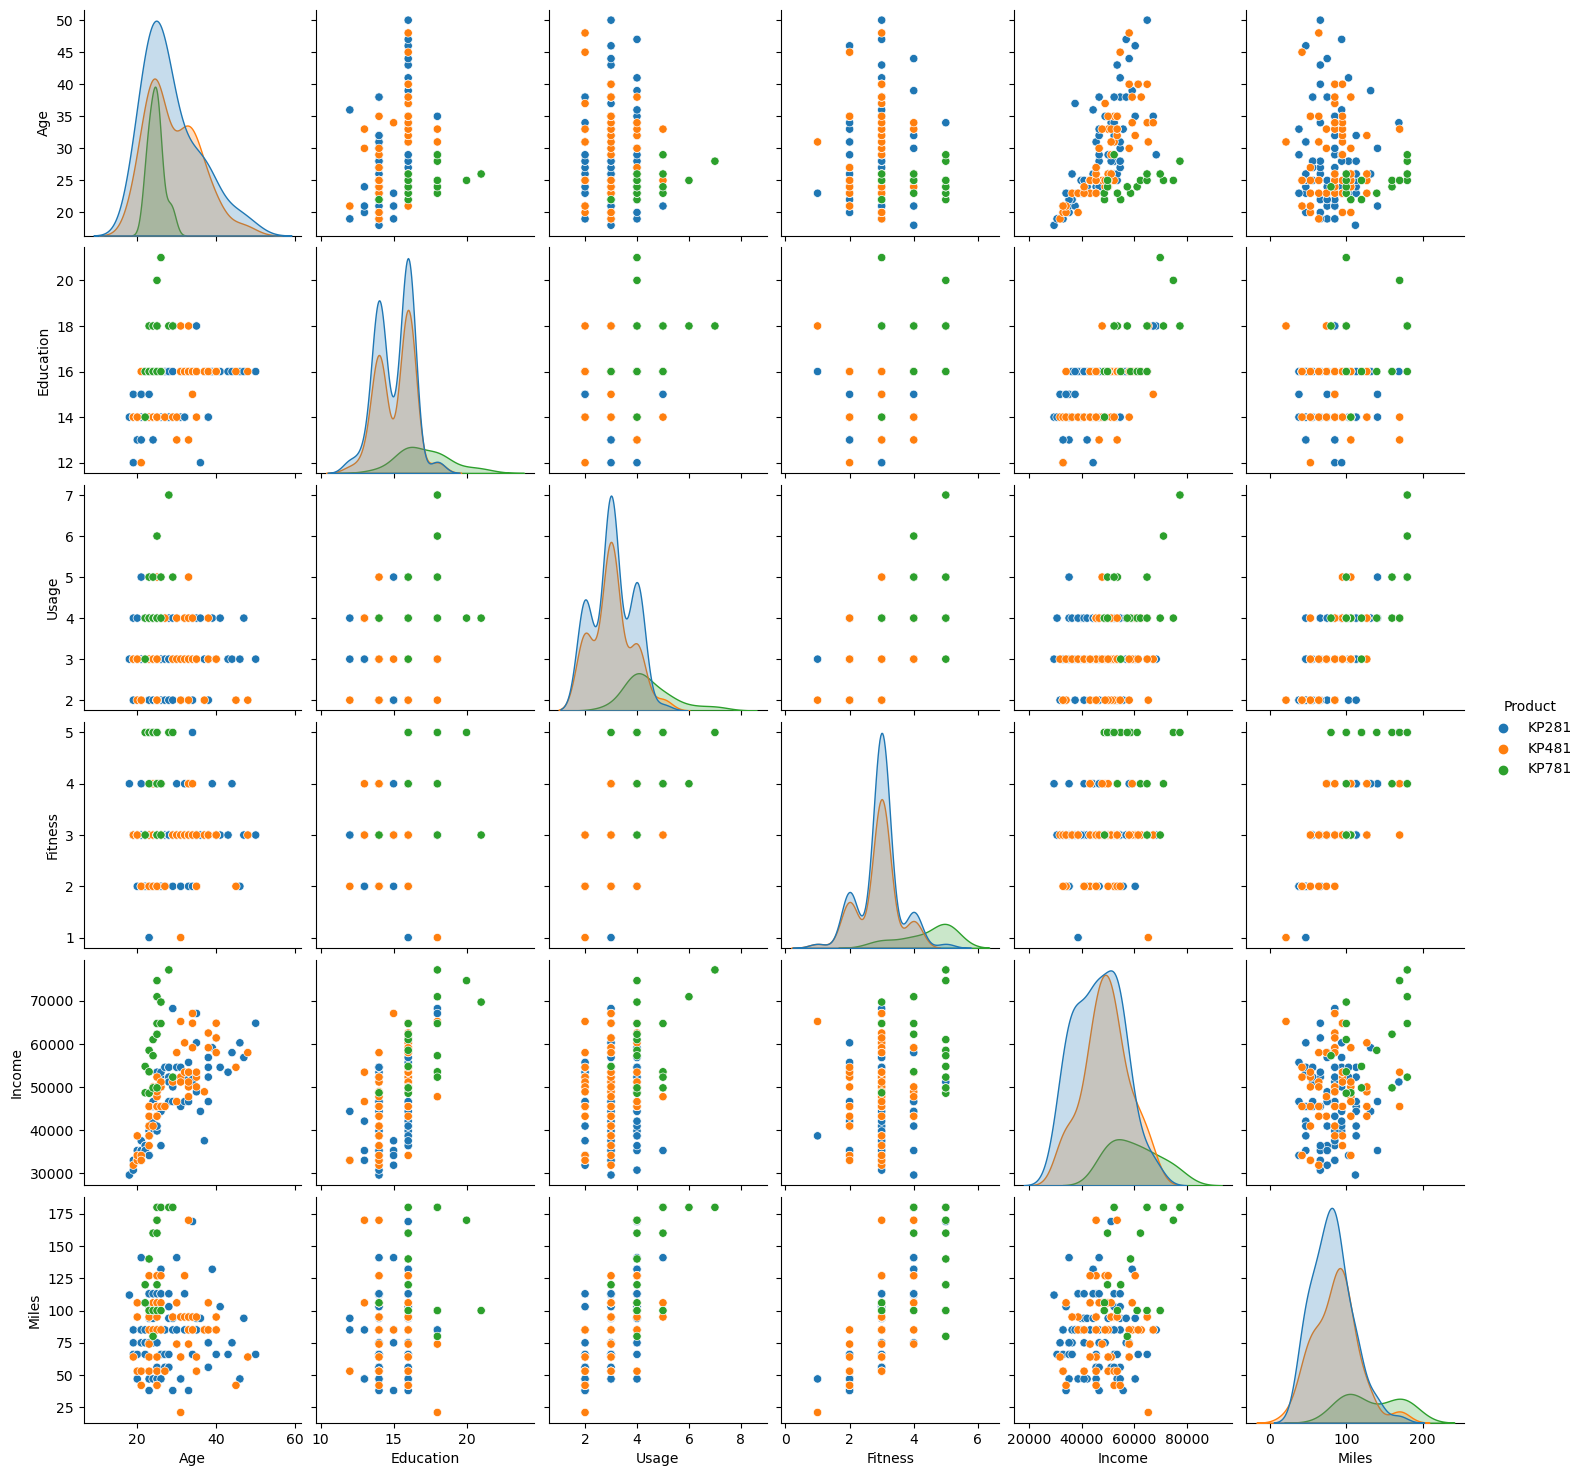

In [643]:
sns.pairplot(data=new_data, hue='Product')

## Customer Profiling

In [689]:
#Customer Profiling

# For KP281-ALl age categories from 18-50, with Education 14-16 years,Both the Genders, preferably partnered.
#           Low usage of 2-4days, 80 miles a week and self rating of 3 in fitness. 
#           Majorly in Low and Medium Income group

In [691]:
# For KP481- Age ranging from 23-40, with 14-16 years education, both the genders, preferably partnered.
#            Low usage of 2-4days, 85 miles a week and self rating of 3 in fitness.
#            Majorly in Low and Medium Income group

In [ ]:
# For KP781- Age ranging from 22-30, with more than 16 years of education, preferably male, irrespective of marital status/
#            High usage of more than 4days, 100 miles a week and a strong self rating of 3-5 in fitness.
#            Majorly in Medium and High Income group

## Final Insights and Suggeestions

In [ ]:
# Final Insights

# The most Treadmill users belong to the age group of 23-26, have eduacation between 14-16 years and run almost 85-95 miles a week.
# The KP781 users run more miles a week(100 miles avg) and Use Treadmills more frequently(4+ time a week), which could be the reason why they rate themselves higher compared to other treadmill users
# KP282 and KP481 is slightly more prefered among Partnered than single people
# Most of the KP281 and KP481 users use treadmills 2 to 4 times a week whereas KP781 users use 4-5 times a week
# Mojority of KP281 and KP481 users rate themselves 3 where KP781 users rate themselves 4-5 in fitness
# Female buy almost equal number of KP281 and KP481 but when it comes to KP781, very few Female prefer. 
# Age has a negetive correlation with Miles & Usage- hence younger gen is fitter than older gen
# Higher income group also tend to spend good amount of time on their fitness
# Most of KP781 users belong to High Income group

In [ ]:
# Suggestions

# KP781 should be marketed towards other Education category as most treadmill users belong to 14-16years education.
# Upselling with High Income group as they spend more time(Usage) and run more miles, but they still prefer KP281 and KP481.
# Focus more on Females to increase sales of KP781 as they buy equal no of KP281 & KP481 as men but less KP781.
# Emphasize Usage and Fitness with KP281 and KP481 user as they have very low usage and fitness rating. This could create brand loyality and ensure future business and even cross selling.
# Focus on people older than 35 to sell KP281 and KP481 as there are very few users in these age categories and they rate themseleves very low and usage is also very less.
